In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Opening JSON file
f = open('LineasLicenciadasElectricidad.json')

# Dictionary
data = json.load(f)  

f.close()

In [3]:
print(data[0])

{'type': 'Feature', 'properties': {'objectid': 372, 'expediente': 'LAM1020', 'sector': 104, 'operador': 'INSTITUTO COLOMBIANO DE DESARROLLO RURAL INCODER ', 'proyecto': 'DISTRITO DE RIEGO TRIANGULO DEL TOLIMA', 'num_act_ad': '2710', 'fec_act_ad': '2006-12-27T00:00:00Z', 'descrip': None, 'region_seg': 2, 'est_act_admin': None}, 'geometry': {'type': 'LineString', 'coordinates': [[-75.11074228299998, 3.838124213873802], [-75.112001362, 3.836986336873822], [-75.11736504200002, 3.832682186873963], [-75.118344316, 3.832437649873961], [-75.11896410600002, 3.831865392873986], [-75.12003554699999, 3.830863554874044], [-75.12105535699999, 3.82971033687407], [-75.12109865000002, 3.829661350874098], [-75.12232270499999, 3.828277182874133], [-75.123697586, 3.826722346874157], [-75.12429538700002, 3.826046321874215], [-75.124892548, 3.825350031874233], [-75.12578323399998, 3.823837541874246], [-75.129092092, 3.82254762387429], [-75.130768988, 3.821256692874362], [-75.13161460100002, 3.82095572787435

In [4]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list
    
datajson = []

for i in range(len(data)):
    datajson.append(data[i]["geometry"]["coordinates"])

In [5]:
datajson2 = []

for i in range(len(datajson)):
    
    try:
        if type(datajson[i][0][0]) is float:
            datajson2.append(datajson[i])
        else:
            for j in range(len(datajson[i])):
                datajson2.append(datajson[i][j])
    except:
        print("err: ",i, len(datajson[i]))

err:  149 0
err:  150 0


In [6]:
for i in range(len(datajson2)):
    if type(datajson2[i][0][0]) is not float:
        print("still not solved: ",i, len(datajson2[i]))

In [7]:
datajson3 = []

for i in range(len(datajson2)):
    
    arr = list(flatten_list(datajson2[i]))
    datajson3.append(arr)

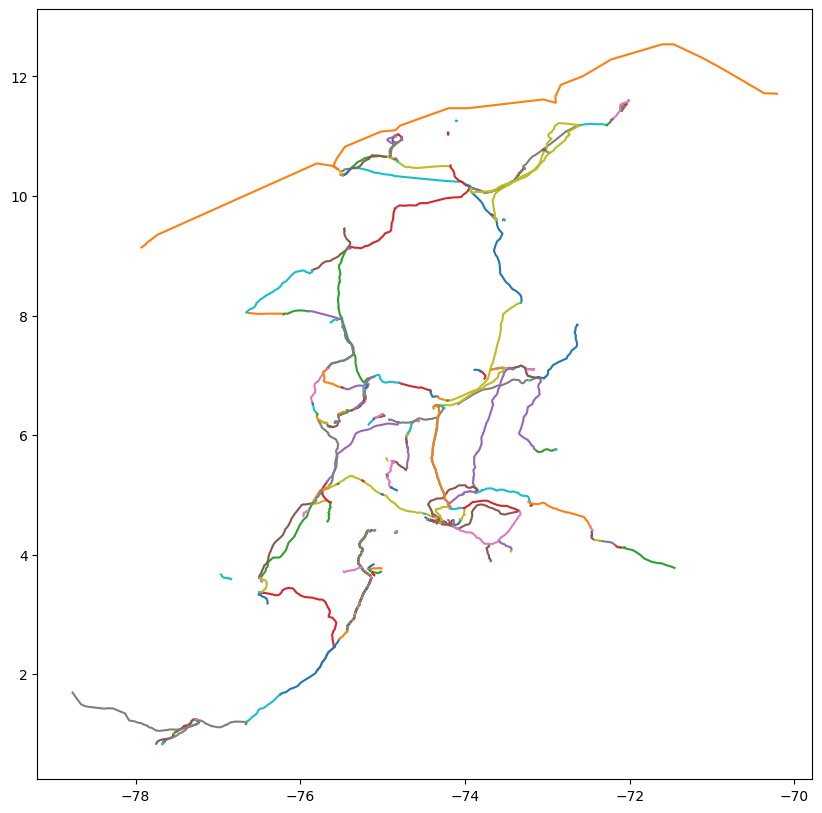

In [8]:
fig = plt.figure(figsize = (10,10))
for i in range(len(datajson3)):
    
    x = []
    y = []
    
    #print(i)
    
    for j in range(0, len(datajson3[i]), 2):
        
        x.append(datajson3[i][j+1])
        y.append(datajson3[i][j])
        
    plt.plot(y,x)


In [9]:
datajson4 = []

for j in range(0, len(datajson3)):
    
    line = []
    
    for i in range(0, len(datajson3[j])-2,2):
        
        array = []

        array.append(datajson3[j][i])
        array.append(datajson3[j][i+1])
        array.append(datajson3[j][i+2])
        array.append(datajson3[j][i+3])
        
        line.append(array)
        
    datajson4.append(line)


In [10]:
print(datajson4[0])

[[-75.11074228299998, 3.838124213873802, -75.112001362, 3.836986336873822], [-75.112001362, 3.836986336873822, -75.11736504200002, 3.832682186873963], [-75.11736504200002, 3.832682186873963, -75.118344316, 3.832437649873961], [-75.118344316, 3.832437649873961, -75.11896410600002, 3.831865392873986], [-75.11896410600002, 3.831865392873986, -75.12003554699999, 3.830863554874044], [-75.12003554699999, 3.830863554874044, -75.12105535699999, 3.82971033687407], [-75.12105535699999, 3.82971033687407, -75.12109865000002, 3.829661350874098], [-75.12109865000002, 3.829661350874098, -75.12232270499999, 3.828277182874133], [-75.12232270499999, 3.828277182874133, -75.123697586, 3.826722346874157], [-75.123697586, 3.826722346874157, -75.12429538700002, 3.826046321874215], [-75.12429538700002, 3.826046321874215, -75.124892548, 3.825350031874233], [-75.124892548, 3.825350031874233, -75.12578323399998, 3.823837541874246], [-75.12578323399998, 3.823837541874246, -75.129092092, 3.82254762387429], [-75.12

In [11]:
save_file3 = open("LineasElectricasDepurado.json", "w") 
json.dump(datajson4, save_file3, indent = 6) 
save_file3.close() 